# Email Spam Classifier Project

Welcome to the Email Spam Classifier project! In this notebook, we aim to build a machine learning model that can effectively distinguish between spam and non-spam (ham) emails. The project involves preprocessing the email text data, exploring different machine learning models, and evaluating their performance.

## Project Outline

1. **Data Exploration:** Understand the structure of the dataset and explore the distribution of spam and non-spam emails.

2. **Text Preprocessing:** Clean and preprocess the email text data, including tasks such as tokenization, lemmatization, and vectorization.

3. **Model Selection:** Experiment with various machine learning models for classification. In this project, we have selected the Multinomial Naive Bayes (MultinomialNB) model.

4. **Model Training:** Train the selected model (MultinomialNB) on the preprocessed data, fine-tuning hyperparameters for optimal performance.

5. **Evaluation:** Evaluate the MultinomialNB model's performance using appropriate metrics. This includes accuracy, precision, recall, and F1-score.

6. **Conclusion:** Summarize the findings, discuss challenges, and propose potential improvements.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Exploratory Data Analysis

In [2]:
data_path = "/kaggle/input/email-spam-classification-dataset/combined_data.csv"
data = pd.read_csv(data_path)
data.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [3]:
lengths = data["text"].apply(len)
lengths = np.array(lengths)
np.sum(lengths <= 3072), np.sum(lengths > 3072)

(73644, 9804)

In [4]:
data["label"].value_counts()

label
1    43910
0    39538
Name: count, dtype: int64

In [5]:
np.sum(data.duplicated())

0

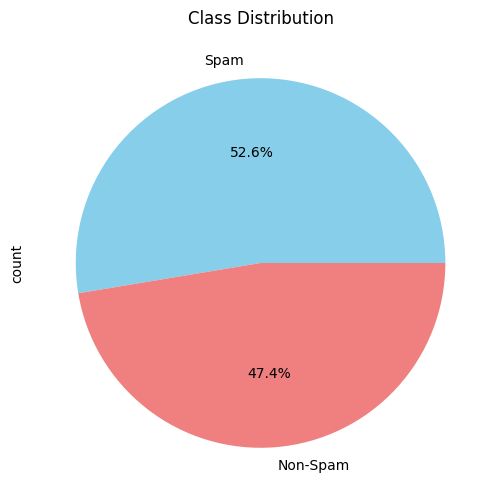

In [6]:
plt.figure(figsize=(6, 6))
data['label'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['Spam', 'Non-Spam'], colors=['skyblue', 'lightcoral'])
plt.title('Class Distribution')
plt.show()

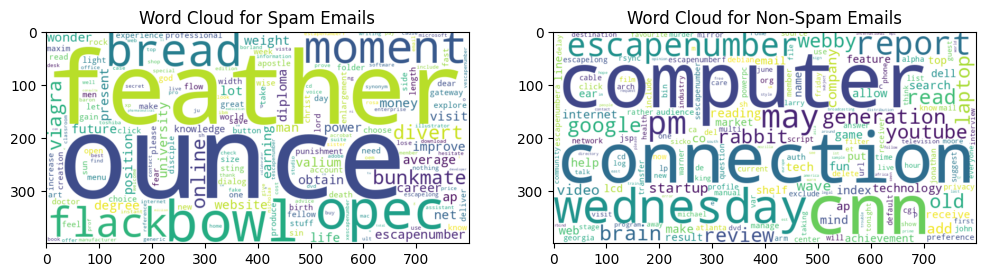

In [7]:
from wordcloud import WordCloud

def remove_special_characters(text):
    pattern = r'[^a-zA-Z0-9\s]'
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text

def preprocess_and_remove_duplicates(text):
    text = remove_special_characters(text)
    words = text.lower().split()
    # Remove duplicates while maintaining order
    unique_words = list(dict.fromkeys(words))
    return ' '.join(unique_words)

spam_text = ' '.join(data[data['label'] == 1]['text'])
non_spam_text = ' '.join(data[data['label'] == 0]['text'])

# Preprocess and remove duplicates
spam_text = preprocess_and_remove_duplicates(spam_text)
non_spam_text = preprocess_and_remove_duplicates(non_spam_text)

# Word cloud for spam emails
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
wc_spam = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(spam_text)
plt.imshow(wc_spam, interpolation='bilinear')
plt.title('Word Cloud for Spam Emails')

# Word cloud for non-spam emails
plt.subplot(1, 2, 2)
wc_non_spam = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(non_spam_text)
plt.imshow(wc_non_spam, interpolation='bilinear')
plt.title('Word Cloud for Non-Spam Emails')

plt.show()

# Data Preprocessing

## Get the text to lower case.

In [8]:
def to_lower_case(text):
    return text.lower()

data["text"] = data["text"].apply(to_lower_case)

## Remove Special Characters

In [9]:
data["text"] = data["text"].apply(remove_special_characters)

## Remove Stopwords

In [10]:
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
stop_words = set(stopwords.words("english"))

def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

data['text'] = data['text'].apply(remove_stopwords)

## Lemmatization

In [12]:
import spacy

nlp = spacy.load("en_core_web_sm")

def lemmatize_text_spacy(text):
    doc = nlp(text)
    lemmatized_words = [token.lemma_ for token in doc]
    return ' '.join(lemmatized_words)

data['text'] = data['text'].apply(lemmatize_text_spacy)

# Build The Model - Multinomial Naive Bayes

### Split The Data

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

### CountVectorizer for text Representation

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train The Model

In [15]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

# Predictions on Test Set

In [16]:
y_pred = nb_classifier.predict(X_test_vectorized)

# Evaluating The Model

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.975434391851408

Confusion Matrix:
[[7840   98]
 [ 312 8440]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      7938
           1       0.99      0.96      0.98      8752

    accuracy                           0.98     16690
   macro avg       0.98      0.98      0.98     16690
weighted avg       0.98      0.98      0.98     16690



# Save The Model

In [19]:
import joblib

model_filename = 'naive_bayes_spam_classifier_model.joblib'
joblib.dump(nb_classifier, model_filename)

print(f"Model saved as '{model_filename}'")

loaded_nb_classifier = joblib.load(model_filename)

Model saved as 'naive_bayes_spam_classifier_model.joblib'
